<a href="https://colab.research.google.com/github/dohyun93/hongong_mldl/blob/main/5_1_%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 상황
# 화이트와인/레드와인에 대한 표기가 없는 데이터가 주어졌을 때
# 이들을 분류하는 로지스틱 회귀모델을 적용하여 어떤 종류인지 분류하는 모델을 만들어야 한다.

import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
# 0: 레드와인 (음성클래스)
# 1: 화이트와인 (양성클래스)

# 즉, 양성클래스인 화이트와인을 골라내는 분류 모델이 만들어진다.

# 그 전에 판다스의 유용한 메서드 두 개를 알아보자.
# 1. pd.info()
wine.info()
# info 메서드는 누락된 데이터가 있는지, 데이터프레임의 각 열의 데이터타입이 뭔지 확인하는데 사용한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
# 2. pd.describe()
wine.describe()

# 평균, 표준편차, 최소값, 1사분위수, 중간값, 3사분위수, 최대값 순서로 각 열의 데이터를 확인할 수 있다.
# 1사분위수란 데이터를 일렬로 오름차순으로 늘어놓았을 때 1/4 번째 수를 말한다.

# 만약 4개 데이터가 있을 때 중간값을 확인하면 가운데 2개값의 평균을 사용한다.

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
# train_test_split 은 기본적으로 25%를 테스트세트로 지정한다.
# test_size 매개변수로 테스트세트 비율을 조절할 수 있다. (아래는 20%로 지정한 모습)
train_input, test_input, train_target, test_target = train_test_split(data, target, random_state=42, test_size=0.2)

# StandardScaler 로 스케일을 표준화하자.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [6]:
# 훈련세트, 테스트세트의 점수가 모두 낮아 과소적합된 것으로 볼 수 있다.
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [7]:
# 왜 위같은 계수를 학습했는지 알 길이 없다.
# 결정트리 모델로 분류 정확도를 높여보자.

# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


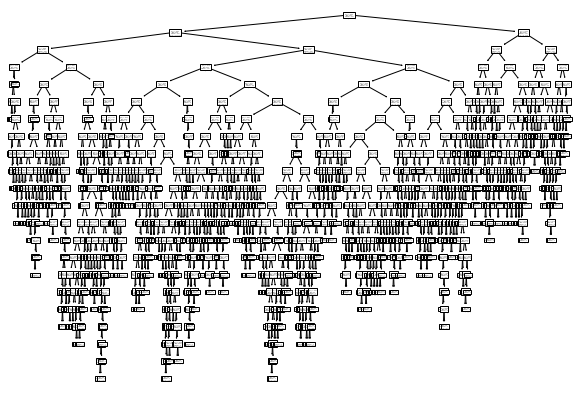

In [8]:
# 훈련/테스트 세트에 대해 위에서 살펴본 로지스틱 회귀보다는 뛰어난 성능을 보이지만,
# 과대적합 된 것을 알 수 있다.

# 결정 트리는 사이킷런이 plot_tree() 메서드로 결정 트리를 이해하기 쉬운 트리 그림으로 출력해준다.
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()